In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('covid_19_indonesia_time_series_all.csv')
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,3,0,0,3,3,0,0,...,106.836118,-6.204699,0.28,0.28,0.00,0.00,0.00%,0.00%,NaN,NaN
1,3/1/2020,ID-JB,Jawa Barat,3,0,0,3,3,0,0,...,107.603708,-6.920432,0.07,0.07,0.00,0.00,0.00%,0.00%,NaN,NaN
2,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,5,0,0,...,106.836118,-6.204699,0.18,0.46,0.00,0.00,0.00%,0.00%,0.67,1.00
3,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00%,0.00%,NaN,NaN
4,3/2/2020,ID-JB,Jawa Barat,0,0,0,0,3,0,0,...,107.603708,-6.920432,0.00,0.07,0.00,0.00,0.00%,0.00%,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,6/30/2020,ID-SG,Sulawesi Tenggara,18,0,12,6,363,6,234,...,122.070311,-4.124689,6.83,137.74,0.00,2.28,1.65%,64.46%,9.00,1.00
3489,6/30/2020,ID-SA,Sulawesi Utara,27,1,10,16,1121,81,186,...,124.521240,1.259638,10.22,424.32,0.38,30.66,7.23%,16.59%,1.08,0.25
3490,6/30/2020,ID-SB,Sumatera Barat,1,0,12,-11,726,31,600,...,100.465062,-0.850253,0.18,131.54,0.00,5.62,4.27%,82.64%,NaN,1.00
3491,6/30/2020,ID-SS,Sumatera Selatan,26,7,5,14,2048,88,1024,...,104.169465,-3.216212,3.16,249.22,0.85,10.71,4.30%,50.00%,1.13,3.50


In [3]:
df.isnull().sum()

Date                              0
Location ISO Code                 0
Location                          0
New Cases                         0
New Deaths                        0
New Recovered                     0
New Active Cases                  0
Total Cases                       0
Total Deaths                      0
Total Recovered                   0
Total Active Cases                0
Location Level                    0
City or Regency                3493
Province                        121
Country                           0
Continent                         0
Island                          121
Time Zone                       121
Special Status                 2970
Total Regencies                   0
Total Cities                     95
Total Districts                   0
Total Urban Villages             97
Total Rural Villages            122
Area (km2)                        0
Population                        0
Population Density                0
Longitude                   

In [4]:
df['Province'].fillna(df['Location'], inplace=True)
df.drop(columns=['Location', 'City or Regency', 'Continent', 'Special Status', 'Time Zone'], inplace=True)
df

,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,3,0,0,3,3,0,0,3,...,106.836118,-6.204699,0.28,0.28,0.00,0.00,0.00%,0.00%,NaN,NaN
1,3/1/2020,ID-JB,3,0,0,3,3,0,0,3,...,107.603708,-6.920432,0.07,0.07,0.00,0.00,0.00%,0.00%,NaN,NaN
2,3/2/2020,ID-JK,2,0,0,2,5,0,0,5,...,106.836118,-6.204699,0.18,0.46,0.00,0.00,0.00%,0.00%,0.67,1.00
3,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00%,0.00%,NaN,NaN
4,3/2/2020,ID-JB,0,0,0,0,3,0,0,3,...,107.603708,-6.920432,0.00,0.07,0.00,0.00,0.00%,0.00%,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,6/30/2020,ID-SG,18,0,12,6,363,6,234,123,...,122.070311,-4.124689,6.83,137.74,0.00,2.28,1.65%,64.46%,9.00,1.00
3489,6/30/2020,ID-SA,27,1,10,16,1121,81,186,854,...,124.521240,1.259638,10.22,424.32,0.38,30.66,7.23%,16.59%,1.08,0.25
3490,6/30/2020,ID-SB,1,0,12,-11,726,31,600,95,...,100.465062,-0.850253,0.18,131.54,0.00,5.62,4.27%,82.64%,NaN,1.00
3491,6/30/2020,ID-SS,26,7,5,14,2048,88,1024,936,...,104.169465,-3.216212,3.16,249.22,0.85,10.71,4.30%,50.00%,1.13,3.50


In [5]:
# Membuat pemetaan antara provinsi dan pulau
province_to_island = {
    "Jawa": "Jawa",
    "Banten": "Jawa",
    "Daerah Istimewa Yogyakarta": "Jawa",
    "DKI Jakarta": "Jawa",
    "Jawa Barat": "Jawa",
    "Jawa Tengah": "Jawa",
    "Jawa Timur": "Jawa",
    "Kalimantan": "Kalimantan",
    "Kalimantan Barat": "Kalimantan",
    "Kalimantan Selatan": "Kalimantan",
    "Kalimantan Tengah": "Kalimantan",
    "Kalimantan Timur": "Kalimantan",
    "Kalimantan Utara": "Kalimantan",
    "Maluku": "Maluku",
    "Maluku Utara": "Maluku",
    "Nusa Tenggara": "Nusa Tenggara",
    "Bali": "Nusa Tenggara",
    "Nusa Tenggara Barat": "Nusa Tenggara",
    "Nusa Tenggara Timur": "Nusa Tenggara",
    "Papua": "Papua",
    "Papua Barat": "Papua",
    "Sulawesi": "Sulawesi",
    "Gorontalo": "Sulawesi",
    "Sulawesi Barat": "Sulawesi",
    "Sulawesi Selatan": "Sulawesi",
    "Sulawesi Tengah": "Sulawesi",
    "Sulawesi Tenggara": "Sulawesi",
    "Sulawesi Utara": "Sulawesi",
    "Sumatera": "Sumatera",
    "Aceh": "Sumatera",
    "Bengkulu": "Sumatera",
    "Jambi": "Sumatera",
    "Kepulauan Bangka Belitung": "Sumatera",
    "Kepulauan Riau": "Sumatera",
    "Lampung": "Sumatera",
    "Riau": "Sumatera",
    "Sumatera Barat": "Sumatera",
    "Sumatera Selatan": "Sumatera",
    "Sumatera Utara": "Sumatera",
    "Indonesia": "Indonesia"
}

# Mengisi nilai nan di kolom Island berdasarkan pemetaan province_to_island
df["Island"] = df["Province"].map(province_to_island)
df

,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,3,0,0,3,3,0,0,3,...,106.836118,-6.204699,0.28,0.28,0.00,0.00,0.00%,0.00%,NaN,NaN
1,3/1/2020,ID-JB,3,0,0,3,3,0,0,3,...,107.603708,-6.920432,0.07,0.07,0.00,0.00,0.00%,0.00%,NaN,NaN
2,3/2/2020,ID-JK,2,0,0,2,5,0,0,5,...,106.836118,-6.204699,0.18,0.46,0.00,0.00,0.00%,0.00%,0.67,1.00
3,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00%,0.00%,NaN,NaN
4,3/2/2020,ID-JB,0,0,0,0,3,0,0,3,...,107.603708,-6.920432,0.00,0.07,0.00,0.00,0.00%,0.00%,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,6/30/2020,ID-SG,18,0,12,6,363,6,234,123,...,122.070311,-4.124689,6.83,137.74,0.00,2.28,1.65%,64.46%,9.00,1.00
3489,6/30/2020,ID-SA,27,1,10,16,1121,81,186,854,...,124.521240,1.259638,10.22,424.32,0.38,30.66,7.23%,16.59%,1.08,0.25
3490,6/30/2020,ID-SB,1,0,12,-11,726,31,600,95,...,100.465062,-0.850253,0.18,131.54,0.00,5.62,4.27%,82.64%,NaN,1.00
3491,6/30/2020,ID-SS,26,7,5,14,2048,88,1024,936,...,104.169465,-3.216212,3.16,249.22,0.85,10.71,4.30%,50.00%,1.13,3.50


In [6]:
df.isnull().sum()

Date                             0
Location ISO Code                0
New Cases                        0
New Deaths                       0
New Recovered                    0
New Active Cases                 0
Total Cases                      0
Total Deaths                     0
Total Recovered                  0
Total Active Cases               0
Location Level                   0
Province                         0
Country                          0
Island                           0
Total Regencies                  0
Total Cities                    95
Total Districts                  0
Total Urban Villages            97
Total Rural Villages           122
Area (km2)                       0
Population                       0
Population Density               0
Longitude                        0
Latitude                         0
New Cases per Million            0
Total Cases per Million          0
New Deaths per Million           0
Total Deaths per Million         0
Case Fatality Rate  

In [7]:
# Mengonversi ke tipe data datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Mengganti bulan 13 menjadi bulan 1, dan bulan 14 menjadi bulan 2
df['Date'] = df['Date'].apply(lambda x: x.replace(month=((x.month - 1) % 12) + 1) if x.month > 12 else x)
df

,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,3,0,0,3,3,0,0,3,...,106.836118,-6.204699,0.28,0.28,0.00,0.00,0.00%,0.00%,NaN,NaN
1,2020-03-01,ID-JB,3,0,0,3,3,0,0,3,...,107.603708,-6.920432,0.07,0.07,0.00,0.00,0.00%,0.00%,NaN,NaN
2,2020-03-02,ID-JK,2,0,0,2,5,0,0,5,...,106.836118,-6.204699,0.18,0.46,0.00,0.00,0.00%,0.00%,0.67,1.00
3,2020-03-02,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00%,0.00%,NaN,NaN
4,2020-03-02,ID-JB,0,0,0,0,3,0,0,3,...,107.603708,-6.920432,0.00,0.07,0.00,0.00,0.00%,0.00%,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,2020-06-30,ID-SG,18,0,12,6,363,6,234,123,...,122.070311,-4.124689,6.83,137.74,0.00,2.28,1.65%,64.46%,9.00,1.00
3489,2020-06-30,ID-SA,27,1,10,16,1121,81,186,854,...,124.521240,1.259638,10.22,424.32,0.38,30.66,7.23%,16.59%,1.08,0.25
3490,2020-06-30,ID-SB,1,0,12,-11,726,31,600,95,...,100.465062,-0.850253,0.18,131.54,0.00,5.62,4.27%,82.64%,NaN,1.00
3491,2020-06-30,ID-SS,26,7,5,14,2048,88,1024,936,...,104.169465,-3.216212,3.16,249.22,0.85,10.71,4.30%,50.00%,1.13,3.50


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         3493 non-null   datetime64[ns]
 1   Location ISO Code            3493 non-null   object        
 2   New Cases                    3493 non-null   int64         
 3   New Deaths                   3493 non-null   int64         
 4   New Recovered                3493 non-null   int64         
 5   New Active Cases             3493 non-null   int64         
 6   Total Cases                  3493 non-null   int64         
 7   Total Deaths                 3493 non-null   int64         
 8   Total Recovered              3493 non-null   int64         
 9   Total Active Cases           3493 non-null   int64         
 10  Location Level               3493 non-null   object        
 11  Province                     3493 non-null 

In [9]:
df2 = df.copy()

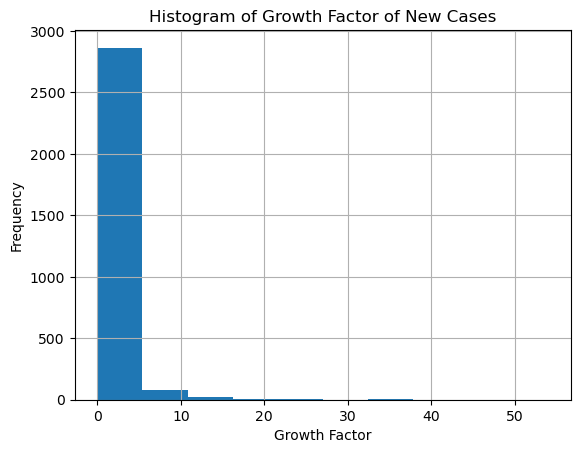

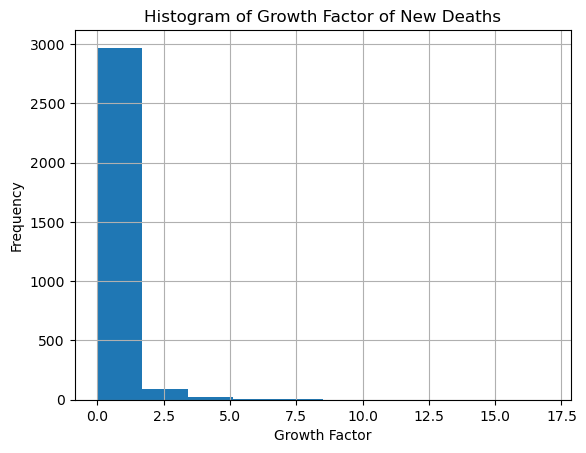

In [10]:
import matplotlib.pyplot as plt
# Membuat histogram untuk Growth Factor of New Cases
df2['Growth Factor of New Cases'].hist()
plt.title('Histogram of Growth Factor of New Cases')
plt.xlabel('Growth Factor')
plt.ylabel('Frequency')
plt.show()

# Membuat histogram untuk Growth Factor of New Deaths
df2['Growth Factor of New Deaths'].hist()
plt.title('Histogram of Growth Factor of New Deaths')
plt.xlabel('Growth Factor')
plt.ylabel('Frequency')
plt.show()

In [11]:
df_filtered = df2[df2['Province'] != 'Indonesia']
df_filtered

,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,3,0,0,3,3,0,0,3,...,106.836118,-6.204699,0.28,0.28,0.00,0.00,0.00%,0.00%,NaN,NaN
1,2020-03-01,ID-JB,3,0,0,3,3,0,0,3,...,107.603708,-6.920432,0.07,0.07,0.00,0.00,0.00%,0.00%,NaN,NaN
2,2020-03-02,ID-JK,2,0,0,2,5,0,0,5,...,106.836118,-6.204699,0.18,0.46,0.00,0.00,0.00%,0.00%,0.67,1.00
4,2020-03-02,ID-JB,0,0,0,0,3,0,0,3,...,107.603708,-6.920432,0.00,0.07,0.00,0.00,0.00%,0.00%,0.00,1.00
5,2020-03-03,ID-JK,2,0,0,2,7,0,0,7,...,106.836118,-6.204699,0.18,0.65,0.00,0.00,0.00%,0.00%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,2020-06-30,ID-SG,18,0,12,6,363,6,234,123,...,122.070311,-4.124689,6.83,137.74,0.00,2.28,1.65%,64.46%,9.00,1.00
3489,2020-06-30,ID-SA,27,1,10,16,1121,81,186,854,...,124.521240,1.259638,10.22,424.32,0.38,30.66,7.23%,16.59%,1.08,0.25
3490,2020-06-30,ID-SB,1,0,12,-11,726,31,600,95,...,100.465062,-0.850253,0.18,131.54,0.00,5.62,4.27%,82.64%,NaN,1.00
3491,2020-06-30,ID-SS,26,7,5,14,2048,88,1024,936,...,104.169465,-3.216212,3.16,249.22,0.85,10.71,4.30%,50.00%,1.13,3.50


In [16]:
df_filtered.isnull().sum()

Date                             0
Location ISO Code                0
New Cases                        0
New Deaths                       0
New Recovered                    0
New Active Cases                 0
Total Cases                      0
Total Deaths                     0
Total Recovered                  0
Total Active Cases               0
Location Level                   0
Province                         0
Country                          0
Island                           0
Total Regencies                  0
Total Cities                    95
Total Districts                  0
Total Urban Villages            97
Total Rural Villages           122
Area (km2)                       0
Population                       0
Population Density               0
Longitude                        0
Latitude                         0
New Cases per Million            0
Total Cases per Million          0
New Deaths per Million           0
Total Deaths per Million         0
Case Fatality Rate  

In [17]:
df3 = df_filtered.copy()

In [18]:
columns_to_fill = ['Total Regencies', 'Total Cities', 'Total Districts', 'Total Urban Villages', 
                   'Total Rural Villages', 'Area (km2)', 'Population', 'Population Density', 
                   'Longitude', 'Latitude', 'New Cases per Million', 'Total Cases per Million', 
                   'New Deaths per Million', 'Total Deaths per Million', 'Case Fatality Rate', 
                   'Case Recovered Rate', 'Growth Factor of New Cases', 'Growth Factor of New Deaths']

df3[columns_to_fill] = df3[columns_to_fill].fillna(0)
df3

,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,3,0,0,3,3,0,0,3,...,106.836118,-6.204699,0.28,0.28,0.00,0.00,0.00%,0.00%,0.00,0.00
1,2020-03-01,ID-JB,3,0,0,3,3,0,0,3,...,107.603708,-6.920432,0.07,0.07,0.00,0.00,0.00%,0.00%,0.00,0.00
2,2020-03-02,ID-JK,2,0,0,2,5,0,0,5,...,106.836118,-6.204699,0.18,0.46,0.00,0.00,0.00%,0.00%,0.67,1.00
4,2020-03-02,ID-JB,0,0,0,0,3,0,0,3,...,107.603708,-6.920432,0.00,0.07,0.00,0.00,0.00%,0.00%,0.00,1.00
5,2020-03-03,ID-JK,2,0,0,2,7,0,0,7,...,106.836118,-6.204699,0.18,0.65,0.00,0.00,0.00%,0.00%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,2020-06-30,ID-SG,18,0,12,6,363,6,234,123,...,122.070311,-4.124689,6.83,137.74,0.00,2.28,1.65%,64.46%,9.00,1.00
3489,2020-06-30,ID-SA,27,1,10,16,1121,81,186,854,...,124.521240,1.259638,10.22,424.32,0.38,30.66,7.23%,16.59%,1.08,0.25
3490,2020-06-30,ID-SB,1,0,12,-11,726,31,600,95,...,100.465062,-0.850253,0.18,131.54,0.00,5.62,4.27%,82.64%,0.00,1.00
3491,2020-06-30,ID-SS,26,7,5,14,2048,88,1024,936,...,104.169465,-3.216212,3.16,249.22,0.85,10.71,4.30%,50.00%,1.13,3.50


In [19]:
df3.to_csv('covid_19_indonesia_time_series_all_processed.csv', index=False)